In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv('train_data.csv')

In [37]:
ytrain = df['pred']
xtrain = df.drop('pred',axis=1)

In [38]:
xtrain.head()

,L1-dcache-miss-per,cache-miss-per
0,1.26,49.670
1,1.88,42.466
2,1.14,44.571
3,1.13,32.751
4,1.11,43.302


In [39]:
ytrain.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pred, dtype: float64

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(xtrain)

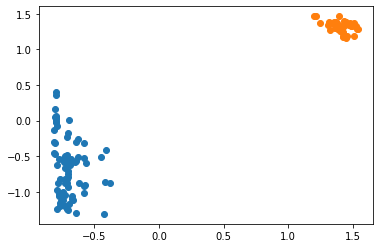

In [41]:
plt.scatter(X[ytrain==0][:,0],X[ytrain==0][:,1])
plt.scatter(X[ytrain==1][:,0],X[ytrain==1][:,1])
plt.show()

In [42]:
X_train,X_val,Y_train,Y_val = train_test_split(X,ytrain,test_size=0.8,random_state=42)

In [43]:
svm = SVC(gamma = 'auto', kernel='linear')
model = svm.fit(X_train,Y_train)

In [49]:
a = model.coef_[0]
b = model.intercept_
print(a,b)

[0.66619797 0.46519173] [-0.49286158]


In [44]:
pred = model.predict(X_val)
np.average(pred==Y_val)

1.0

In [63]:
def plotting(X,Xt,Y,clf):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    inv = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    xx1 = inv[:,0].reshape(xx.shape)
    yy1 = inv[:,1].reshape(xx.shape)
    plt.contour(xx1, yy1, Z, cmap=plt.cm.Paired)
    plt.scatter(Xt[Y==0][:,0],Xt[Y==0][:,1],color='m')
    plt.scatter(Xt[Y==1][:,0],Xt[Y==1][:,1],color='y')
    l1,l2 = [0,25],[20,20]
    m1,m2 = [10,10],[0,100]
    q1,q2 = [0,25],[70,70]
    r1,r2 = [20,20],[0,100]
    plt.plot(l1,l2,m1,m2,q1,q2,r1,r2)
    plt.xlabel('L1-dcache-miss%')
    plt.ylabel('cache-miss%')
    plt.show()

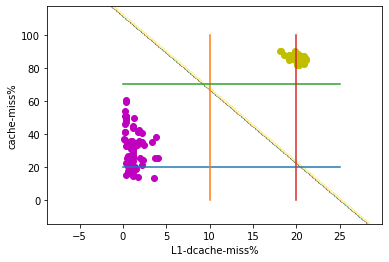

In [64]:
plotting(X,xtrain.values,ytrain,model)

In [35]:
xtest = pd.read_csv('rhmr_test.csv')
xtest.head()

,L1-dcache-miss-per,cache-miss-per
0,19.66,85.840
1,20.22,86.434
2,20.61,86.385
3,19.95,84.731
4,20.32,85.733


In [44]:
xs = scaler.transform(xtest)
pred = model.predict(xs)
np.average(pred==1)

1.0

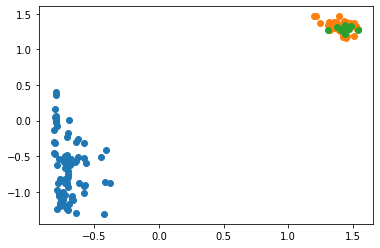

In [46]:
plt.scatter(X[ytrain==0][:,0],X[ytrain==0][:,1])
plt.scatter(X[ytrain==1][:,0],X[ytrain==1][:,1])
plt.scatter(xs[:,0],xs[:,1])
plt.show()

In [47]:
import joblib
joblib.dump(model,'model.pkl',compress=9)

['model.pkl']

In [48]:
joblib.dump(scaler,'model_scaler.sav')

['model_scaler.sav']